In [18]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
pd.options.display.float_format = '{:,.3f}'.format
sns.set()

# **Cohort Heatmap**

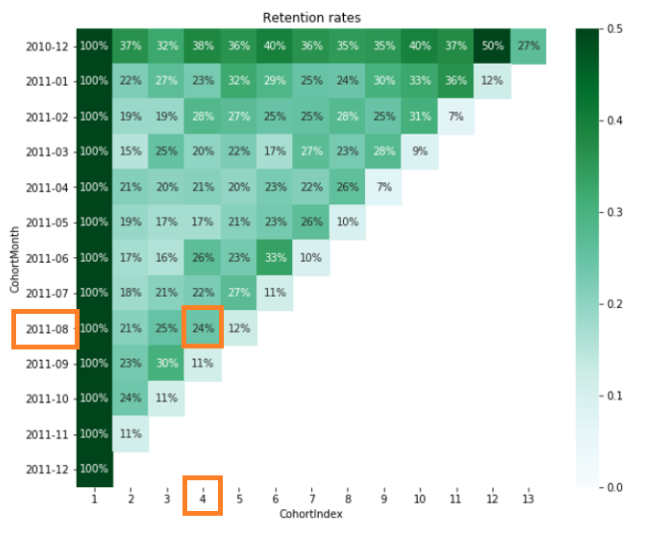

* 24% of the cohort which signed up on 2011-08 were active 4 months later

In [ ]:
online = pd.read_csv('online.csv', parse_dates=['InvoiceDate']).drop(columns='Unnamed: 0')
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


# **Assign acquisition month cohort**

In [ ]:
def get_month(x): 
    return dt.datetime(x.year, x.month, 1)

online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month)
grouping = online.groupby('CustomerID')['InvoiceMonth']
online['CohortMonth'] = grouping.transform('min')
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01


# **Extract integer values from data**



In [ ]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

# **Assign time offset value**

In [ ]:
invoice_year, invoice_month, _ = get_date_int(online, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(online, 'CohortMonth')
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

online['CohortIndex'] = years_diff * 12 + months_diff + 1
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01,1
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01,1
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01,4


# **Count monthly active customers from each cohort**

In [ ]:
grouping = online.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,716.0,246.0,221.0,251.0,245.0,285.0,249.0,236.0,240.0,265.0,254.0,348.0,172.0
2011-01-01,332.0,69.0,82.0,81.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,NaN
2011-02-01,316.0,58.0,57.0,83.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,NaN,NaN
2011-03-01,388.0,63.0,100.0,76.0,83.0,67.0,98.0,85.0,107.0,38.0,NaN,NaN,NaN
2011-04-01,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,NaN,NaN,NaN,NaN
2011-05-01,249.0,40.0,43.0,36.0,52.0,58.0,61.0,22.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,207.0,33.0,26.0,41.0,49.0,62.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,173.0,28.0,31.0,38.0,44.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,139.0,30.0,28.0,35.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### ***Assign daily acquisition cohort***

As you have seen in the video, defining a cohort is the first step to cohort analysis. You will now create daily cohorts based on the day each customer has made their first transaction.

The data has been loaded as `online` DataFrame.

* Create a function by passing a datetime object extracting year, month and day from `x`.
* Create a `InvoiceDay` column by passing the `InvoiceDate` columns and applying the `get_day` function.
* Create a `groupby` object that groups `CustomerID` variable, and selects `InvoiceDay` for further calculations.
* Create a `CohortDay` column by selecting the minimum InvoiceDay value.

In [ ]:
# Define a function that will parse the date
def get_day(x): 
    return dt.datetime(x.year, x.month, x.day) 

# Create InvoiceDay column
online['InvoiceDay'] = online['InvoiceDate'].apply(get_day) 

# Group by CustomerID and select the InvoiceDay value
grouping = online.groupby('CustomerID')['InvoiceDay'] 

# Assign a minimum InvoiceDay value to the dataset
online['CohortDay'] = grouping.transform('min')

# View the top 5 rows
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,InvoiceDay,CohortDay
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7,2011-10-25,2011-04-11
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3,2011-11-20,2011-09-12
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01,1,2011-07-14,2011-07-14
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01,1,2011-11-23,2011-11-23
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01,4,2011-05-25,2011-02-25


Now each customer belongs to a daily acquisition cohort that you can use for further analysis!

### ***Calculate time offset in days - part 1***

Calculating time offset for each transaction allows you to report the metrics for each cohort in a comparable fashion.

First, we will create 6 variables that capture the integer value of years, months and days for Invoice and Cohort Date using the `get_date_int()` function that's been already defined for you:

```
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day
```

* Create `invoice_year`, `invoice_month`, `invoice_day` objects by calling `get_date_int` function on `InvoiceDay` column.
* Create `cohort_year`, `cohort_month`, `cohort_day` objects by calling `get_date_int` function on `CohortDay` column.

In [ ]:
# Get the integers for date parts from the `InvoiceDay` column
invoice_year, invoice_month, invoice_day = get_date_int(online, 'InvoiceDay')

# Get the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, cohort_day = get_date_int(online, 'CohortDay')

Now you will use these integer values to calculate business metrics for our time cohorts!

### ***Calculate time offset in days - part 2***

Great work! Now, we have six different data sets with year, month and day values for Invoice and Cohort dates - `invoice_year`, `cohort_year`, `invoice_month`, `cohort_month`, `invoice_day`, and `cohort_day`.

In this exercise you will calculate the difference between the Invoice and Cohort dates in years, months and days separately and then calculate the total days difference between the two. This will be your days offset which we will use in the next exercise to visualize the customer count. 

* Find the difference in years between the moment of the invoice and the moment the cohort was created.
* Find the difference in months between the moment of the invoice and the moment the cohort was created.
* Find the difference in days between the moment of the invoice and the moment the cohort was created.
* Calculate the number of days for the `CohortIndex` (assume 365 days in a year, and 30 days in a month).

In [ ]:
# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Calculate difference in days
days_diff = invoice_day - cohort_day

# Extract the difference in days from all previous values
online['CohortIndex'] = years_diff * 365 + months_diff * 30 + days_diff + 1
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,InvoiceDay,CohortDay
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,195,2011-10-25,2011-04-11
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,69,2011-11-20,2011-09-12
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01,1,2011-07-14,2011-07-14
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01,1,2011-11-23,2011-11-23
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01,91,2011-05-25,2011-02-25


In [ ]:
grouping = online.groupby(['CohortDay', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortDay', columns='CohortIndex', values='CustomerID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,365,366,367,368,369,370,371,372,373,374
CohortDay,,,,,,,,,,,,,,,,,,,,,
2010-12-01,69.0,3.0,1.0,NaN,3.0,5.0,2.0,4.0,4.0,2.0,...,4.0,4.0,6.0,NaN,NaN,3.0,5.0,3.0,4.0,1.0
2010-12-02,78.0,NaN,NaN,NaN,1.0,3.0,2.0,4.0,3.0,NaN,...,2.0,2.0,NaN,NaN,3.0,1.0,2.0,2.0,1.0,NaN
2010-12-03,30.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,...,2.0,NaN,1.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN
2010-12-05,59.0,3.0,2.0,1.0,4.0,2.0,NaN,5.0,7.0,3.0,...,7.0,3.0,2.0,3.0,2.0,1.0,NaN,NaN,NaN,NaN
2010-12-06,57.0,NaN,2.0,1.0,1.0,NaN,1.0,3.0,6.0,2.0,...,1.0,2.0,4.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-04,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-05,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-06,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


You have successfully assigned the daily time offset to each transaction and can use it for running daily cohort analysis!

# **Calculate retention rate**

Retention gives you the percentage of active customers compared to the total number of customers.

1. Store the first column as `cohort_sizes`

In [ ]:
cohort_sizes = cohort_counts.iloc[:, 0]
cohort_sizes.head()

CohortMonth
2010-12-01    716.0
2011-01-01    332.0
2011-02-01    316.0
2011-03-01    388.0
2011-04-01    255.0
Name: 1, dtype: float64

2. Divide all values in the cohort_counts table by `cohort_sizes`

In [ ]:
retention = cohort_counts.div(cohort_sizes, axis=0)

3. Review the retention table

In [ ]:
pd.options.display.float_format = '{:,.1f}'.format
retention * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,34.4,30.9,35.1,34.2,39.8,34.8,33.0,33.5,37.0,35.5,48.6,24.0
2011-01-01,100.0,20.8,24.7,24.4,33.1,27.1,24.7,25.9,31.3,30.7,37.3,13.6,NaN
2011-02-01,100.0,18.4,18.0,26.3,26.9,23.4,25.3,26.3,27.2,30.1,8.9,NaN,NaN
2011-03-01,100.0,16.2,25.8,19.6,21.4,17.3,25.3,21.9,27.6,9.8,NaN,NaN,NaN
2011-04-01,100.0,19.2,20.4,19.2,18.4,20.4,22.0,23.1,6.7,NaN,NaN,NaN,NaN
2011-05-01,100.0,16.1,17.3,14.5,20.9,23.3,24.5,8.8,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,15.9,12.6,19.8,23.7,30.0,9.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,16.2,17.9,22.0,25.4,9.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,21.6,20.1,25.2,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Average quantity for each cohort**

In [ ]:
grouping = online.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['Quantity'].mean()
cohort_data = cohort_data.reset_index()
average_quantity = cohort_data.pivot(index='CohortMonth',
                                     columns='CohortIndex',
                                     values='Quantity')
average_quantity.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.1,12.3,12.2,13.2,13.7,11.3,10.6,12.8,13.2,13.0,14.5,10.9,13.7
2011-01-01,10.9,10.8,10.0,10.1,14.3,13.2,17.4,16.4,18.7,10.2,10.7,13.2,NaN
2011-02-01,12.1,14.3,10.6,11.5,17.5,12.2,17.3,13.2,13.4,15.9,14.3,NaN,NaN
2011-03-01,9.6,14.2,13.0,10.2,16.1,12.7,11.6,11.5,9.0,9.6,NaN,NaN,NaN
2011-04-01,9.9,11.1,12.4,11.5,11.4,7.7,10.4,9.4,6.6,NaN,NaN,NaN,NaN
2011-05-01,14.1,9.6,15.3,11.6,11.9,8.5,9.8,7.3,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.6,16.1,18.1,11.2,12.4,7.2,9.7,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,10.9,16.4,5.6,10.1,6.2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,10.5,7.4,5.5,5.7,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### ***Calculate retention rate from scratch***

You have seen how to create retention and average quantity metrics table for the monthly acquisition cohorts. Now it's you time to build the retention metrics by yourself.

The online dataset has been loaded to you with monthly cohorts and cohort index assigned from this lesson. Feel free to print it in the Console.

Also, we have created a loaded a groupby object as grouping DataFrame with this command: `grouping = online.groupby(['CohortMonth', 'CohortIndex'])`

* Select the customer ID column, count the number of unique values, store it as `cohort_data`, and reset its index.

* Create a pivot with monthly cohort in the index, cohort index in the columns and the customer ID in the values.

* Select the first column and store it to `cohort_sizes`.

* Divide the cohort count by cohort sizes along the rows.

In [ ]:
# Count the number of unique values per customer ID
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

# Create a pivot 
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:, 0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.3,0.3,0.4,0.3,0.4,0.3,0.3,0.3,0.4,0.4,0.5,0.2
2011-01-01,1.0,0.2,0.2,0.2,0.3,0.3,0.2,0.3,0.3,0.3,0.4,0.1,NaN
2011-02-01,1.0,0.2,0.2,0.3,0.3,0.2,0.3,0.3,0.3,0.3,0.1,NaN,NaN
2011-03-01,1.0,0.2,0.3,0.2,0.2,0.2,0.3,0.2,0.3,0.1,NaN,NaN,NaN
2011-04-01,1.0,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.1,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.2,0.2,0.1,0.2,0.2,0.2,0.1,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.2,0.1,0.2,0.2,0.3,0.1,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.2,0.2,0.2,0.3,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.2,0.2,0.3,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### ***Calculate average price***

You will now calculate the average price metric and analyze if there are any differences in shopping patterns across time and across cohorts.

* Create a **`groupby`** object and pass the monthly cohort and cohort index as a list.

* Select the unit price column, calculate the average, and store it to `cohort_data`.

* Reset the index of `cohort_data` DataFrame.

* Create a pivot with monthly cohort in the index, cohort index in the columns and the unit price in the values, and print the result.

In [ ]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = online.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the unit price column
cohort_data = grouping['UnitPrice'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_price = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='UnitPrice')
average_price.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,3.0,3.0,3.0,2.8,2.7,6.9,2.8,3.0,2.7,2.7,3.0,2.8,2.6
2011-01-01,3.2,3.1,3.0,3.0,3.1,3.0,3.0,2.5,2.7,2.9,2.6,2.0,NaN
2011-02-01,3.1,4.0,3.3,2.9,3.3,2.9,2.8,2.7,2.9,2.7,3.1,NaN,NaN
2011-03-01,3.5,3.6,3.5,2.8,2.7,2.5,2.7,2.9,2.5,2.4,NaN,NaN,NaN
2011-04-01,3.3,4.4,3.4,2.6,2.8,2.8,2.8,2.6,2.6,NaN,NaN,NaN,NaN
2011-05-01,3.1,2.8,2.5,2.7,2.5,2.3,2.7,2.3,NaN,NaN,NaN,NaN,NaN
2011-06-01,2.8,2.4,2.7,3.1,2.5,2.4,2.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,3.2,3.1,3.4,2.5,2.4,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,2.9,3.7,5.4,6.9,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Build the retention heatmap**

* ช่องที่เป็น NaNs หมายความว่า more recent cohorts had less time to be active
  * `CohortMonth` คือเดือนที่เริ่มซื้อ
  * `CohortIndex` คือจำนวนเดือนหลังจากเริ่มซื้อครั้งแรก
  * ถ้าข้อมูลมีถึงล่าสุดที่ `2011-12-01` ก็หมายความว่า ไม่มีข้อมูลในช่อง (`2011-12-01, 2`) 

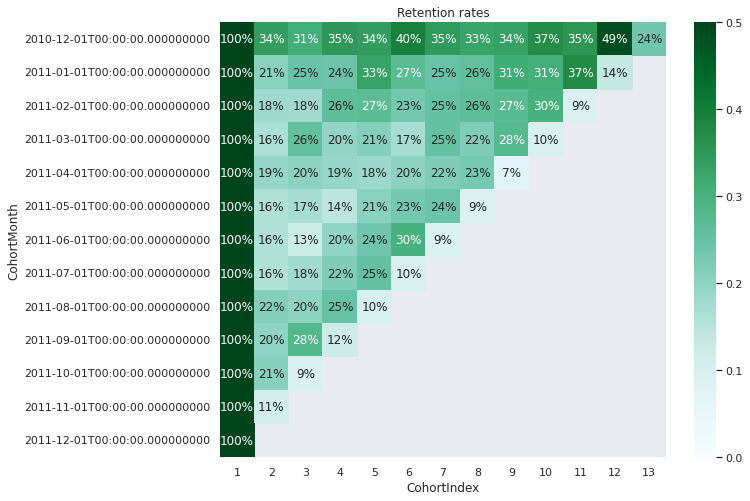

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.title('Retention rates')
sns.heatmap(data=retention, 
            annot=True,
            fmt='.0%',
            vmin=0.0, #vmin vmax ขจัดผลของ outliers ออกไป
            vmax=0.5, 
            cmap='BuGn')
plt.show()

### ***Visualize average quantity metric***

You are now going to visualize average quantity values in a heatmap.



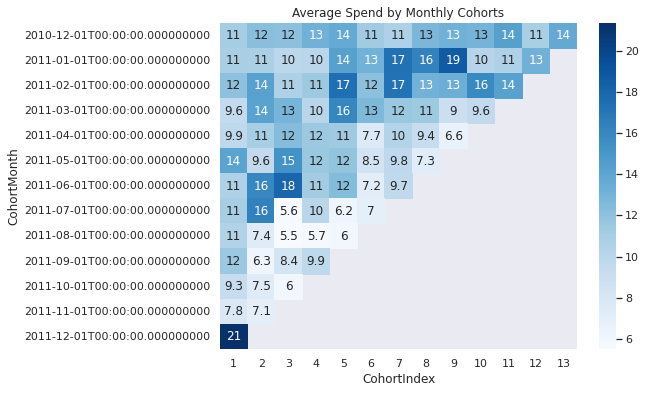

In [ ]:
# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(8, 6))

# Add a title
plt.title('Average Spend by Monthly Cohorts')

# Create the heatmap
sns.heatmap(data=average_quantity, annot=True, cmap='Blues')
plt.show()

# **Calculate percentiles with Pandas**

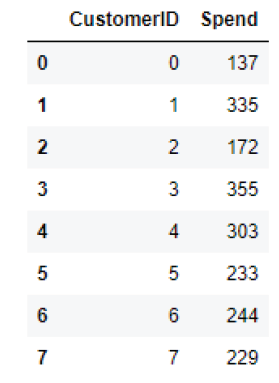

In [ ]:
spend_quartiles = pd.qcut(data['Spend'], q=4, labels=range(1,5))
data['Spend_Quartile'] = spend_quartiles
data.sort_values('Spend')

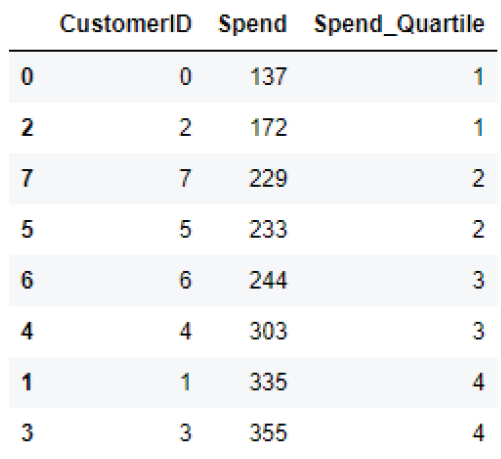



# **Assigning Recency labels** (ยิ่งค่าน้อย ยิ่งดี)

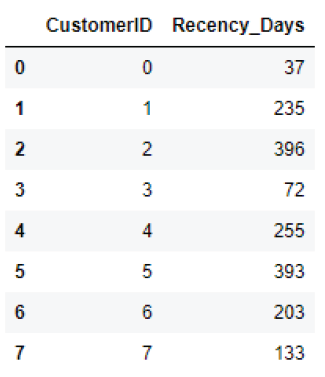



In [ ]:
# Create numbered labels
r_labels = list(range(4, 0, -1))

# Divide into groups based on quartiles
recency_quartiles = pd.qcut(data['Recency_Days'], q=4, labels=r_labels)

# Create new column
data['Recency_Quartile'] = recency_quartiles

# Sort recency values from lowest to highest
data.sort_values('Recency_Days')

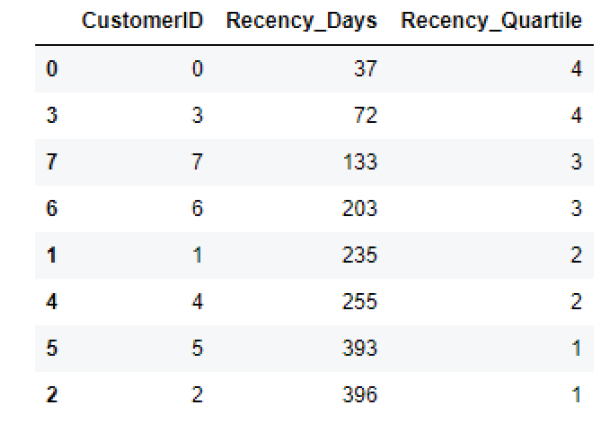



# **Custom labels**

In [ ]:
# Create string labels
r_labels = ['Active', 'Lapsed', 'Inactive', 'Churned']

# Divide into groups based on quartiles
recency_quartiles = pd.qcut(data['Recency_Days'], q=4, labels=r_labels)

# Create new column
data['Recency_Quartile'] = recency_quartiles

# Sort values from lowest to highest
data.sort_values('Recency_Days')

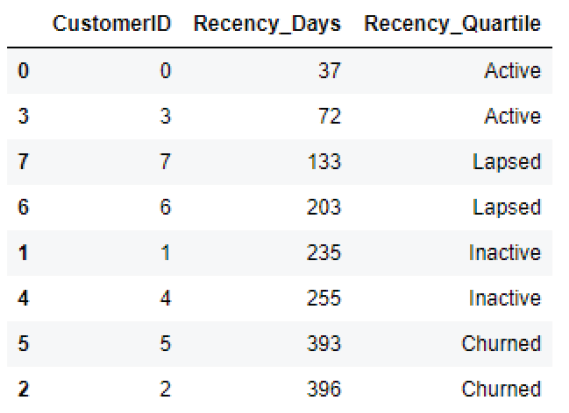



# **Dataset and preparations**

New `TotalSum` column = `Quantity` $\times$ `UnitPrice`.

In [36]:
online = pd.read_csv('online12M.csv', parse_dates=['InvoiceDate']).drop(columns='Unnamed: 0')
online['TotalSum'] = online['Quantity'].mul(online['UnitPrice'])
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25,2.1,14286,United Kingdom,12.6
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20,1.4,16360,United Kingdom,1.4
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14,3.8,13933,United Kingdom,22.5
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23,2.1,17290,United Kingdom,2.1
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25,6.0,17663,United Kingdom,17.9


* A pre-processed `online` DataFrame with only the latest 12 months of data

In [37]:
print('Min:{}; Max:{}'.format(min(online.InvoiceDate), max(online.InvoiceDate)))

Min:2010-12-10 00:00:00; Max:2011-12-09 00:00:00


* Create a hypothetical **snapshot_day** data as if we're doing analysis recently

In [38]:
print(f"max(online['InvoiceDate']) = {max(online['InvoiceDate'])}")
snapshot_date = max(online['InvoiceDate']) + dt.timedelta(days=1)
print(f'snapshot_date = {snapshot_date}')

max(online['InvoiceDate']) = 2011-12-09 00:00:00
snapshot_date = 2011-12-10 00:00:00


# **Calculate RFM metrics**



In [39]:
# Aggregate data on a customer level
datamart = online.groupby(['CustomerID']).agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
                                               'InvoiceNo': 'count',
                                               'TotalSum': 'sum'})

# Rename columns for easier interpretation
datamart.rename(columns = {'InvoiceDate': 'Recency', 
                           'InvoiceNo': 'Frequency',
                           'TotalSum': 'MonetaryValue'}, inplace=True)

# Check the first rows
datamart.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12747,3,25,948.7
12748,1,888,"7,046.2"
12749,4,37,813.5
12820,4,17,268.0
12822,71,9,146.2


# **Recency quartile**

In [40]:
r_labels = range(4, 0, -1)
r_quartiles = pd.qcut(datamart['Recency'], 4, labels = r_labels)
datamart = datamart.assign(R=r_quartiles.values)
datamart.head()

,Recency,Frequency,MonetaryValue,R
CustomerID,,,,
12747,3,25,948.7,4
12748,1,888,"7,046.2",4
12749,4,37,813.5,4
12820,4,17,268.0,4
12822,71,9,146.2,2


# **Frequency and monetary quartiles**

In [41]:
f_labels, m_labels = range(1,5), range(1,5)

f_quartiles = pd.qcut(datamart['Frequency'], 4, labels = f_labels)
m_quartiles = pd.qcut(datamart['MonetaryValue'], 4, labels = m_labels)

datamart = datamart.assign(F=f_quartiles.values)
datamart = datamart.assign(M=m_quartiles.values)

datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12747,3,25,948.7,4,4,4
12748,1,888,"7,046.2",4,4,4
12749,4,37,813.5,4,4,4
12820,4,17,268.0,4,3,3
12822,71,9,146.2,2,2,3


# **Build RFM segment and RFM score**

* Concatenate RFM quartile values to `RFM_Segment`
* Sum RFM quartiles values to `RFM_Score`

In [44]:
def join_rfm(x): 
    return str(x['R']) + str(x['F']) + str(x['M'])
    
datamart['RFM_Segment'] = datamart.apply(join_rfm, axis=1)
datamart['RFM_Score']   = datamart[['R','F','M']].sum(axis=1)
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12747,3,25,948.7,4,4,4,444,12
12748,1,888,"7,046.2",4,4,4,444,12
12749,4,37,813.5,4,4,4,444,12
12820,4,17,268.0,4,3,3,433,10
12822,71,9,146.2,2,2,3,223,7


# **Largest RFM segments**

In [50]:
datamart.groupby('RFM_Segment')['RFM_Score'].size().sort_values(ascending=False)[:10]

RFM_Segment
444    372
111    345
211    169
344    156
233    129
222    128
333    120
122    117
311    114
433    113
Name: RFM_Score, dtype: int64

# **Filtering on RFM segments**

* Select bottom RFM segment "111" and view top 5 rows

In [51]:
datamart[datamart['RFM_Segment']=='111'][:5]

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12837,174,2,10.6,1,1,1,111,3
12852,295,2,32.6,1,1,1,111,3
12902,265,4,42.0,1,1,1,111,3
12915,149,2,35.9,1,1,1,111,3
12922,162,4,57.2,1,1,1,111,3


# **Summary metrics per RFM score**

In [52]:
datamart.groupby('RFM_Score').agg({'Recency': 'mean',                                   
                                   'Frequency': 'mean',
                                   'MonetaryValue': ['mean', 'count'] }).round(1)            

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           246.9       2.1          28.4   345
4           162.2       3.1          47.8   337
5           138.9       4.3          78.2   393
6           101.0       6.3         146.3   444
7            78.0       8.5         160.2   382
8            62.6      12.8         196.3   376
9            46.8      16.7         330.3   345
10           31.9      24.0         443.1   355
11           21.8      38.9         705.3   294
12            8.0      75.6       1,653.9   372

# **Grouping into named segments**

* Use RFM score to group customers into Gold, Silver and Bronze segments.

In [56]:
def segment_me(df):
    if df['RFM_Score'] >= 9:
        return 'Gold'
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9):
        return 'Silver'
    else:
        return 'Bronze'

datamart['General_Segment'] = datamart.apply(segment_me, axis=1)
datamart.groupby('General_Segment').agg({'Recency': 'mean',
                                         'Frequency': 'mean',
                                         'MonetaryValue': ['mean', 'count']}).round(1).sort_values(by=('MonetaryValue', 'mean'), ascending=False)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Gold               27.0      39.4         800.8  1366
Silver             95.8       7.9         144.6  1595
Bronze            205.0       2.6          38.0   682

### ***Creating custom segments***

It's your turn to create a custom segmentation based on `RFM_Score` values. You will create a function to build segmentation and then assign it to each customer.

* Create segments named `Top`, `Middle`, `Low`. If the RFM score is greater than or equal to `10`, the level should be `"Top"`. If it's between `6` and `10` it should be `"Middle"`, and otherwise it should be `"Low"`.

* Apply the `rfm_level` function and store it as `RFM_Level` value.

* Print the header with top `5` rows of the datamart.

In [58]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 10:
        return 'Top'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 10)):
        return 'Middle'
    else:
        return 'Low'

# Create a new variable RFM_Level
datamart['RFM_Level'] = datamart.apply(rfm_level, axis=1)

# Print the header with top 5 rows to the console
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment,RFM_Level
CustomerID,,,,,,,,,,
12747,3,25,948.7,4,4,4,444,12,Gold,Top
12748,1,888,"7,046.2",4,4,4,444,12,Gold,Top
12749,4,37,813.5,4,4,4,444,12,Gold,Top
12820,4,17,268.0,4,3,3,433,10,Gold,Top
12822,71,9,146.2,2,2,3,223,7,Silver,Middle


### ***Analyzing custom segments***

As a final step, you will analyze average values of `Recency`, `Frequency` and `MonetaryValue` for the custom segments you've created.

* Calculate the averages for `Recency`, `Frequency` and `MonetaryValue` for each `RFM_Level` segment.

* As the last column, return the size of each segment passing `count` to the `MonetaryValue` column next to the `mean`.


In [59]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = datamart.groupby('RFM_Level').agg({'Recency': 'mean',
                                                   'Frequency': 'mean',
                                                   # Return the size of each segment
                                                   'MonetaryValue': ['mean', 'count']}).round(1)

# Print the aggregated dataset
rfm_level_agg

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Level                                      
Low         180.8       3.2          52.7  1075
Middle       73.9      10.7         202.9  1547
Top          20.3      47.1         959.7  1021

# **Key k-means assumptions**

* Symmetric distribution of variables (not skewed)
* Variables with same average values
* Variables with same variance

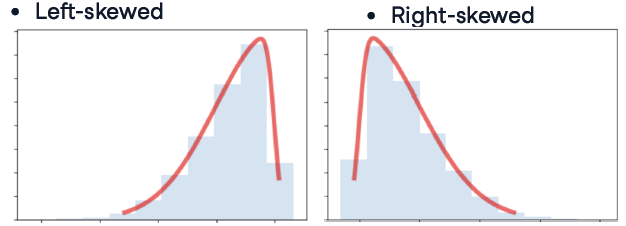



# **Exploring distribution of recency**

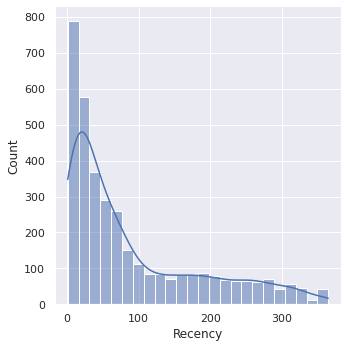

In [15]:
datamart = pd.read_csv('rfm_datamart.csv', index_col='CustomerID')

sns.displot(datamart['Recency'], kde=True) # sns.distplot จะถูกยกเลิก
plt.show()

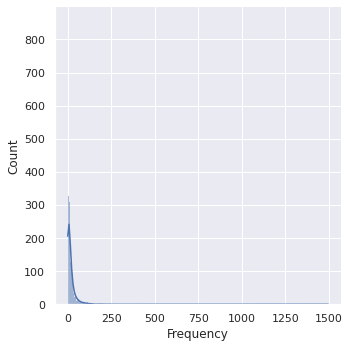

In [16]:
sns.displot(datamart['Frequency'], kde=True)
plt.show()

# **Log transformations to manage skewness**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


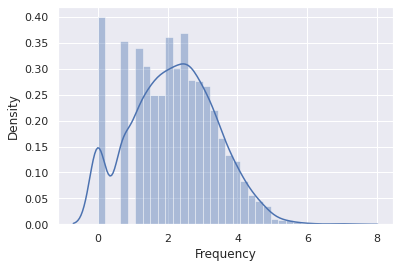

In [17]:
frequency_log= np.log(datamart['Frequency'])

sns.distplot(frequency_log)
plt.show()

# **Combining centering and scaling**



In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
datamart_normalized = scaler.fit_transform(datamart)
print('mean: ', datamart_normalized.mean(axis=0).round(2))
print('std: ', datamart_normalized.std(axis=0).round(2))

mean:  [-0. -0.  0.]
std:  [1. 1. 1.]


# **Why the sequence matters?**

* Log transformation only works with positive data
* Normalization forces data to have negative values and log will not work

# **Sequence**

1. Unskew the data - log transformation
2. Standardize to the same average values
3. Scale to the same standard deviation
4. Store as a separate array to be used for clustering

# **Coding the sequence**

In [22]:
from sklearn.preprocessing import StandardScaler

# Unskew the data
datamart_log = np.log(datamart)

# Store for clustering
scaler = StandardScaler()
datamart_normalized = scaler.fit_transform(datamart_log)

# **Running k-means**

In [23]:
# Import package
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=1)

# Compute k-means clustering on pre-processed data
kmeans.fit(datamart_normalized)

# Extract cluster labels from labels_ attribute
cluster_labels = kmeans.labels_

# **Analyzing average RFM values of each cluster**

In [26]:
pd.options.display.float_format = '{:,.1f}'.format

# Create a cluster label column in the original DataFrame
datamart_rfm_k2 = datamart.assign(Cluster=cluster_labels)

# Calculate average RFM values and size for each cluster
datamart_rfm_k2.groupby(['Cluster']).agg({'Recency': 'mean',
                                          'Frequency': 'mean',
                                          'MonetaryValue': ['mean', 'count']}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         137.0       5.0          92.0  2023
1          32.0      35.0         719.0  1620

# **Elbow criterion method**

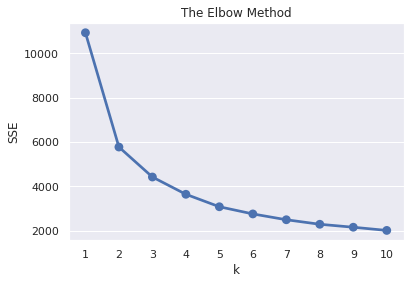

In [28]:
# Fit KMeans and calculate SSE for each *k*
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(datamart_normalized)
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster center
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

# **Approaches to build customer personas**

* Summary statistics for each cluster e.g. average RFM values
* Snake plots (from market research)
* Relative importance of cluster attributes compared to population

## **Summary statistics of each cluster**

In [29]:
datamart = pd.read_csv('rfm_datamart.csv', index_col='CustomerID')

for k in range(2, 4):

    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(datamart_normalized)
    cluster_labels = kmeans.labels_
    datamartk = datamart.assign(Cluster=cluster_labels)
    display(datamartk.groupby(['Cluster']).agg({'Recency': 'mean',
                                          'Frequency': 'mean',
                                          'MonetaryValue': ['mean', 'count']}).round(0))

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         137.0       5.0          92.0  2023
1          32.0      35.0         719.0  1620

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          16.0      50.0       1,051.0   901
1         167.0       3.0          53.0  1156
2          77.0      12.0         216.0  1586

## **Snake Plots**

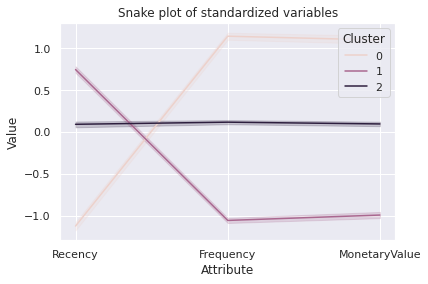

In [30]:
datamart_normalized = pd.DataFrame(datamart_normalized,   
                                   index=datamart.index,
                                   columns=datamart.columns)

datamart_normalized['Cluster'] = datamartk['Cluster']

datamart_melt = pd.melt(datamart_normalized.reset_index(),
                        id_vars=['CustomerID', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'MonetaryValue'],
                        var_name='Attribute',
                        value_name='Value')

plt.title('Snake plot of standardized variables')
sns.lineplot(x="Attribute", y="Value", hue='Cluster', data=datamart_melt)
plt.show()

## **Relative importance**

In [32]:
cluster_avg = datamartk.groupby(['Cluster']).mean()
population_avg = datamart.mean()

relative_imp = cluster_avg / population_avg - 1
relative_imp

,Recency,Frequency,MonetaryValue
Cluster,,,
0,-0.8,1.7,1.8
1,0.8,-0.8,-0.9
2,-0.1,-0.3,-0.4


## **Plot relative importance**

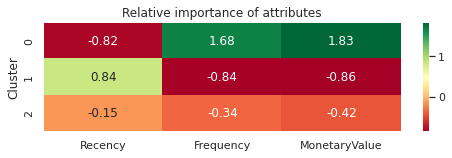

In [33]:
plt.figure(figsize=(8, 2))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

# **Key steps of the segmentation project**

1. Gather data - updated data with an additional variable
2. Pre-process the data
3. Explore the data and decide on the number of clusters
4. Run k-means clustering
5. Analyze and visualize results


### ***Pre-process data***

First step in the segmentation process is to pre-process the data. You will apply log transformation, and then normalize the data to prepare it for clustering.

We have loaded the dataset with RFMT values as `datamart_rfmt`. 

* Apply log transformation to the raw RFMT data.
* Initialize the scaler and fit it on the log-transformed data.
* Transform and store the scaled data as `datamart_rfmt_normalized`.

In [36]:
datamart_rfmt = pd.read_csv('datamart_rfmt.csv', index_col='CustomerID')

# Import StandardScaler 
from sklearn.preprocessing import StandardScaler

# Apply log transformation
datamart_rfmt_log = np.log(datamart_rfmt)

# Initialize StandardScaler and fit it 
scaler = StandardScaler()
scaler.fit(datamart_rfmt_log)

# Transform and store the scaled data as datamart_rfmt_normalized
datamart_rfmt_normalized = scaler.transform(datamart_rfmt_log)

### ***Calculate and plot sum of squared errors***

Now, you will calculate the sum of squared errors for different number of clusters ranging from 1 to 10.

You will use the normalized RFMT data that you created in the previous exercise, it is stored as `datamart_rfmt_normalized`. 

* Initialize **`KMeans`** with `k` clusters and random_state=1 and fit **`KMeans`** on the normalized dataset.

* Assign sum of squared distances to `k` element of `sse` dictionary.


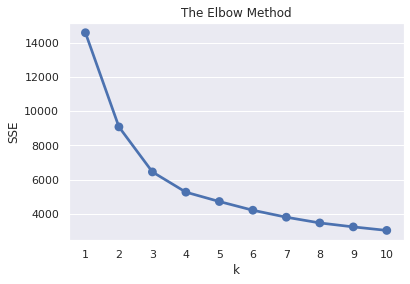

In [37]:
sse = {}

# Fit KMeans and calculate SSE for each k between 1 and 10
for k in range(1, 11):
  
    # Initialize KMeans with k clusters and fit it 
    kmeans = KMeans(n_clusters=k, random_state=1).fit(datamart_rfmt_normalized)
    
    # Assign sum of squared distances to k element of the sse dictionary
    sse[k] = kmeans.inertia_  

# Add the plot title, x and y axis labels
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')

# Plot SSE values for each k stored as keys in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

### ***Build 4-cluster solution***

Perfect, you can see the the recommended number of clusters is somewhere between 3 and 4. Now, you will build the latter number of clusters in this exercise.

The normalized RFMT dataset is available as `datamart_rfmt_normalized`.

* Initialize **`KMeans`** with 4 clusters and random state 1.
* Fit k-means clustering on the normalized data set.
* Extract cluster labels and store them as `cluster_labels` object.

In [38]:
# Import KMeans 
from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters=4, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(datamart_rfmt_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

### ***Analyze the segments***

Fantastic! Final step - analyzing your segmentation solution - you will analyze the average Recency, Frequency, MonetaryValue and Tenure values for each of the four segments you have built previously. Take some time to analyze them and understand what kind of customer groups and behaviors they represent.

The RFMT raw data is available as `datamart_rfmt`, and the cluster labels from the previous exercise is loaded as `cluster_labels`. 

* Create a new DataFrame by adding a cluster label column to `datamart_rfmt`.
* Create a groupby element on a `Cluster` column.
* Calculate average RFMT values and segment sizes per each `Cluster` value.

In [39]:
# Create a new DataFrame by adding a cluster label column to datamart_rfmt
datamart_rfmt_k4 = datamart_rfmt.assign(Cluster=cluster_labels)

# Group by cluster
grouped = datamart_rfmt_k4.groupby(['Cluster'])

# Calculate average RFMT values and segment sizes for each cluster
grouped.agg({'Recency': 'mean',
             'Frequency': 'mean',
             'MonetaryValue': 'mean',
             'Tenure': ['mean', 'count']}).round(1)

Recency Frequency MonetaryValue Tenure      
           mean      mean          mean   mean count
Cluster                                             
0          13.5      53.7       1,142.8  279.6   777
1          33.0       7.2         101.0   45.2   750
2          89.0      15.0         276.7  247.5  1204
3         205.0       3.3          58.7  222.8   912